# Modelado: Random Forest


### Carga de librerías

In [15]:
import pandas as pd
import numpy as np
# Import mlflow for models tracking
import mlflow
# Libraries for models and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Visualization libraries
import matplotlib.pyplot as plt


### Carga de ficheros

In [10]:
df = pd.read_csv("../../data/final/df_train_final.csv")
df.head(5)

,TARGET,DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,QTY_ACTIVE_BUREAU,QTY_APP_LAST_YEAR,RATIO_NONAPPROVED
0,1,-9461,0.139376,0.083037,0.262949,2.0,1.0,0.0
1,0,-16765,0.507626,0.311267,0.622246,1.0,0.0,0.0
2,0,-13778,0.492060,0.774761,0.724000,4.0,1.0,0.0
3,0,-10197,0.363945,0.319760,0.651862,2.0,0.0,0.0
4,0,-13439,0.176653,0.464831,0.715042,4.0,4.0,0.0


### Dataset final

#### Preparación datasets train and test

In [ ]:
# Separate TARGET variable from dependent variables
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Divide dataset in train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Generate expermient tracking in MLflow
exp_name = 'Model RandomForest'
exp_id = mlflow.create_experiment(name=exp_name)

#### Prueba Nro. 1

Evaluamos GridSearchCV para encontrar los mejores parámetros para Random Forest

In [6]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20, 50, 100, 150, 200], 
    'max_depth': [None, 5, 10, 15, 20]
}

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
print("Print results")
display(results)

# Find best model
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Get the best number of trees
print("Best n_estimators:", grid_search.best_params_['n_estimators'])
# Get the best max depth
print("Best max_depth:", grid_search.best_params_['max_depth'])
# Best AUC
print(f"Best AUC: {grid_search.best_score_:.4f}")

# Evaluate best model
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC in test dataset: {auc_score:.4f}")

Print results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.334489,0.142344,0.152316,0.020662,None,10,"{'max_depth': None, 'n_estimators': 10}",0.632990,0.641020,0.619441,0.629209,0.629854,0.630503,0.006947,30
1,11.427747,0.296103,0.247771,0.028623,None,20,"{'max_depth': None, 'n_estimators': 20}",0.656469,0.665992,0.642570,0.657818,0.654110,0.655392,0.007556,29
2,28.665880,0.791057,0.697593,0.135006,None,50,"{'max_depth': None, 'n_estimators': 50}",0.676856,0.683682,0.665846,0.675152,0.677467,0.675801,0.005754,27
3,51.616605,0.310408,1.124441,0.017998,None,100,"{'max_depth': None, 'n_estimators': 100}",0.684994,0.691610,0.675323,0.681133,0.687693,0.684151,0.005585,26
4,77.010024,0.262463,1.670899,0.010883,None,150,"{'max_depth': None, 'n_estimators': 150}",0.686583,0.693245,0.679565,0.684624,0.688090,0.686421,0.004464,25
5,103.069842,1.419833,2.293346,0.052580,None,200,"{'max_depth': None, 'n_estimators': 200}",0.688806,0.696661,0.681005,0.687099,0.691369,0.688988,0.005136,24
6,1.699243,0.025126,0.035321,0.001373,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.716122,0.727359,0.715733,0.718621,0.716025,0.718772,0.004417,16
7,3.285613,0.049735,0.057966,0.002138,5,20,"{'max_depth': 5, 'n_estimators': 20}",0.716921,0.728018,0.719024,0.720629,0.720354,0.720989,0.003751,14
8,7.939512,0.160577,0.117156,0.008240,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.718065,0.728701,0.719714,0.721709,0.720857,0.721809,0.003656,13
9,16.279279,0.556514,0.213399,0.012388,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.718007,0.728282,0.720306,0.722231,0.721987,0.722163,0.003412,12


Best n_estimators: 200
Best max_depth: 10
Best AUC: 0.7299
AUC in test dataset: 0.7312


Entrenar el modelo con los mejores hiperparámetros

In [7]:
# Track each run
with mlflow.start_run(experiment_id=exp_id, run_name="RandomForest - bestparams"):
    # Create and train Random Forest model

    # Initialize the model
    model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

    # Train model
    trained_model = model.fit(X_train, y_train)

    # Evaluate predictions in test dataset of positive class to calculate AUC
    y_pred_auc = trained_model.predict_proba(X_test)[:, 1]
    # Evaluate model for accuracy metric
    y_pred = trained_model.predict(X_test)

    # Classes distribution
    class_distribution = np.bincount(y_pred, minlength=len(np.unique(y)))
    class_distribution_percentage = (class_distribution / len(y_pred)) * 100

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_auc)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)


    # Track evaluation metric used for the model
    mlflow.log_param('n_estimators', 200)
    mlflow.log_param('max_depth', 10)

    # Track metrics
    mlflow.log_metric('roc_auc_score', auc_score)
    mlflow.log_metric('accuracy_score', accuracy)
    mlflow.log_metric('precision_score', precision)
    mlflow.log_metric('recall_score', recall)
    mlflow.log_metric('f1_score', f1)

    # Save model
    mlflow.sklearn.log_model(trained_model, "RandomForest - bestparams")

    # Close MLflow tracking
    mlflow.end_run()

# Print results
print("Distribución final de clases (conteo):", class_distribution)
print("Distribución final de clases (porcentaje):", class_distribution_percentage)

print(f"AUC: {auc_score:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

2024/11/25 14:05:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Distribución final de clases (conteo): [59181    24]
Distribución final de clases (porcentaje): [9.99594629e+01 4.05371168e-02]
AUC: 0.7312
Accuracy: 92.61%
Precision: 0.5833
Recall: 0.0032
F1-Score: 0.0064
Confusion Matrix:
[[54817    10]
 [ 4364    14]]


#### Prueba Nro. 2
Ajuste desbalance de clases (parametro class_weight=balanced)


In [14]:
# Track each run
with mlflow.start_run(experiment_id=exp_id, run_name="RandomForest - balanced"):
    # Create and train Random Forest model

    # Initialize the model
    model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)

    # Train model
    trained_model = model.fit(X_train, y_train)

    # Evaluate predictions in test dataset of positive class to calculate AUC
    y_pred_auc = trained_model.predict_proba(X_test)[:, 1]
    # Evaluate model for accuracy metric
    y_pred = trained_model.predict(X_test)

    # Classes distribution
    class_distribution = np.bincount(y_pred, minlength=len(np.unique(y)))
    class_distribution_percentage = (class_distribution / len(y_pred)) * 100

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_auc)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)


    # Track evaluation metric used for the model
    mlflow.log_param('n_estimators', 200)
    mlflow.log_param('max_depth', 10)

    # Track metrics
    mlflow.log_metric('roc_auc_score', auc_score)
    mlflow.log_metric('accuracy_score', accuracy)
    mlflow.log_metric('precision_score', precision)
    mlflow.log_metric('recall_score', recall)
    mlflow.log_metric('f1_score', f1)

    # Save model
    mlflow.sklearn.log_model(trained_model,"RandomForest - balanced")

    # Close MLflow tracking
    mlflow.end_run()

# Print results
print("Distribución final de clases (conteo):", class_distribution)
print("Distribución final de clases (porcentaje):", class_distribution_percentage)

print(f"AUC: {auc_score:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

2024/12/03 17:25:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Distribución final de clases (conteo): [43512 15693]
Distribución final de clases (porcentaje): [73.49379275 26.50620725]
AUC: 0.7278
Accuracy: 74.58%
Precision: 0.1601
Recall: 0.5738
F1-Score: 0.2503
Confusion Matrix:
[[41646 13181]
 [ 1866  2512]]


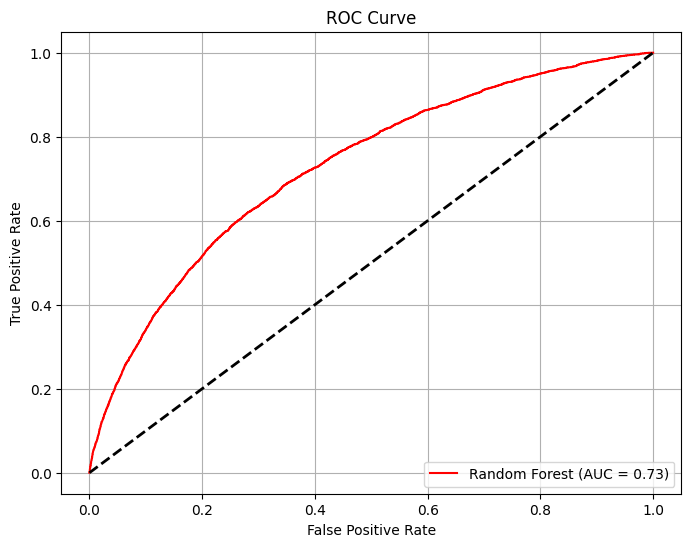

In [16]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()